In [32]:
import math
import pickle
import torch
import torch.nn as nn
import numpy as np
import math, random
import torchvision
from torchvision import datasets, transforms
import torch.optim as optim
from torch.autograd import Variable
import torch.backends.cudnn as cudnn
import matplotlib
import matplotlib.pyplot as plt

In [33]:
batch_size = 100

mnist_train = datasets.MNIST('./MNIST/', train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test  = datasets.MNIST('/MNIST/', train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

train_loader = torch.utils.data.DataLoader(dataset=mnist_train,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=mnist_test,batch_size=1,shuffle=True)

In [28]:
def Corrupt_image(batch,pCType,Param = [5, 5, 5, 0.2, 0.05, 3, 0]):
    ''' Uniform -- Gaussian -- Masking -- Dropout -- Saturation -- Multiplicative -- SuperResoltion
    pCType is the ratio of image for a given type
    Param is the parameter for a given noise'''
    return 0

def Corrupt_Gaussian(Image, sigma):
    torch.normal(0)

In [29]:
#Encoder
class Q_net(nn.Module):
    def __init__(self):
        super(Q_net, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(X_dim, N),
            nn.Dropout(p=prob),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Linear(N, N),
            nn.Dropout(p=prob),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Linear(N, N),
            nn.Dropout(p=prob),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Linear(N, N),
            nn.Dropout(p=prob),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Linear(N, N0),
            nn.Dropout(p=prob),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Linear(N0, z_dim)        
            )
    def forward(self, x):
        xgauss = self.layers(x)
        return xgauss
    
# Decoder
class P_net(nn.Module):
    def __init__(self):
        super(P_net, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(z_dim, N0),
            nn.Dropout(p=prob),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Linear(N0, N),
            nn.Dropout(p=prob),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Linear(N, N),
            nn.Dropout(p=prob),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Linear(N, N),
            nn.Dropout(p=prob),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Linear(N, N),
            nn.Dropout(p=prob),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Linear(N, X_dim),
            nn.Sigmoid()
            )
    def forward(self, x):
        out = self.layers(x)
        return out

Start
0 0.0607035


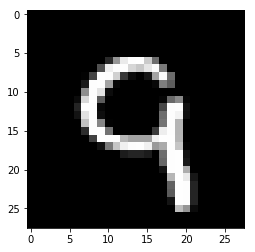

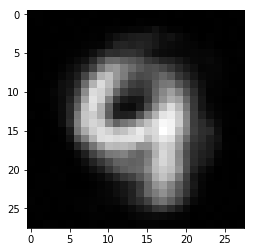

Len list
28
40
55
56
41
27


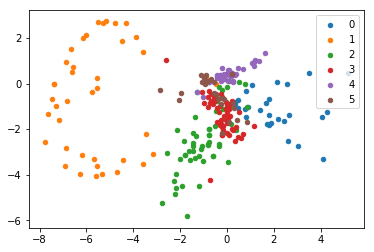

In [30]:
prob = 0.2
X_dim = 784
N = 600
N0 = 150
z_dim = 2

# Set Data Loader(input pipeline)

train_loader = torch.utils.data.DataLoader(dataset=mnist_train,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=mnist_test,batch_size=1,shuffle=True)


torch.manual_seed(10)
Q = Q_net()
P = P_net()     # Encoder/Decoder

Q = Q.cuda()
P = P.cuda()
# Set learning rates
gen_lr, reg_lr = 0.0004, 0.0008
# Set optimizators
P_decoder = optim.Adam(P.parameters(), lr=gen_lr)
Q_encoder = optim.Adam(Q.parameters(), lr=gen_lr)

criterionL1 = nn.MSELoss().cuda()

TINY = 1e-8
LossEpoch = []

for i in range(1):
    if i ==0:
        print('Start')
    loss = []
    for batch, label in train_loader:
        X = batch.view([100,1,784])
        X = Variable(X).cuda()
        z_sample = Q(X)
        X_sample = P(z_sample)
        recon_loss = criterionL1(X_sample, X)
        P_decoder.zero_grad()
        Q_encoder.zero_grad()
        recon_loss.backward()
        P_decoder.step()
        Q_encoder.step()
        loss.append(recon_loss.data)
    l = np.mean(np.array(loss)).cpu().numpy()
    print(i ,l[0])
    LossEpoch.append(l)
        

Q.eval()
P.eval()

List0x = []
List0y = []
List1x = []
List1y = []
List2x = []
List2y = []
List3x = []
List3y = []
List4x = []
List4y = []
List5x = []
List5y = []
for i in range(400):
    pair = iter(test_loader).next()
    testimg = pair[0]
    label = pair[1]
    testimg = Variable(testimg.view([1,784])).cuda()
    coor = Q(testimg)
    coorformat0 = coor[0][0].data.cpu().numpy()
    coorformat1 = coor[0][1].data.cpu().numpy()
    label = label.cpu().numpy()[0]
    if label == 0:
        List0x.append(coorformat0)
        List0y.append(coorformat1)
    if label == 1:
        List1x.append(coorformat0)
        List1y.append(coorformat1)
    if label == 2:
        List2x.append(coorformat0)
        List2y.append(coorformat1)
    if label == 3:
        List3x.append(coorformat0)
        List3y.append(coorformat1)
    if label == 4:
        List4x.append(coorformat0)
        List4y.append(coorformat1)
    if label == 5:
        List5x.append(coorformat0)
        List5y.append(coorformat1)

        
#################################################        
pair = iter(test_loader).next()
testimg = pair[0]
label = pair[1]
testimg = Variable(testimg).cuda()
rec = P(Q(testimg.view([1,784])))
rec = rec[0].cpu().data.numpy().reshape([28,28])
plt.clf()
plt.imshow(testimg.data.cpu().numpy()[0][0][:], cmap='gray')
plt.show()

plt.clf()
plt.imshow(rec, cmap='gray')
plt.show()


#################################################

plt.clf()
plt.scatter(List0x,List0y,label='0', s=20)
plt.scatter(List1x,List1y,label='1', s=20)
plt.scatter(List2x,List2y,label='2', s=20)
plt.scatter(List3x,List3y,label='3', s=20)
plt.scatter(List4x,List4y,label='4', s=20)
plt.scatter(List5x,List5y,label='5', s=20)
plt.legend()

print('Len list')
print(len(List0x))
print(len(List1x))
print(len(List2x))
print(len(List3x))
print(len(List4x))
print(len(List5x))

pair = iter(test_loader).next()
testimg = pair[0]
label = pair[1]
testimg = Variable(testimg).cuda()
rec = P(Q(testimg.view([1,784])))
plt.savefig('./AE4.png',dpi = 300)
plt.show()

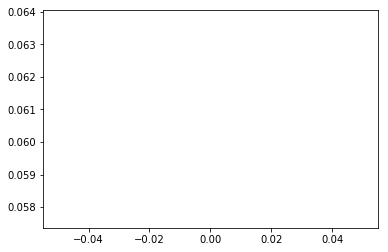

In [31]:
plt.plot(LossEpoch)
plt.show()

In [25]:
torch.normal(torch.zeros([5,5]))


-0.6356  0.9315 -0.3878 -0.7353 -0.9383
-0.6360  0.5631 -0.4559  2.7888 -0.2606
 0.6651 -1.7885  0.7700 -1.3776 -2.8633
-0.0805  0.7619  1.8151  1.2700  0.8875
 0.6232 -0.6322  0.1727 -0.0022 -0.3455
[torch.FloatTensor of size 5x5]